# Simulate a single pendulum system

Refs: 
- https://underactuated.mit.edu/pend.html#section3
- https://tutorials.sciml.ai/html/models/01-classical_physics.html


In this notebook, I'll be deriving the equations of motion of a single pendulum. We will then map it to a multivariate first-order system, discretize the dynamics and simulate the evolution.

![](figures/simple_single_pend.svg)

In [1]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()
IJulia.clear_output();

In [8]:
using Plots
default(label="", grid=false, margin=10Plots.pt)

## Lagrangian mechanics

## DifferentialEquations solver

In [9]:
using DifferentialEquations

In [3]:
# Constants
const g = 9.81
L = 1.0

# Initial Conditions
u₀ = [0,π/2]
tspan = (0.0,6.3)

# Define ODE
function simple_pendulum(du,u,p,t)
    θ = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/L)*sin(θ)
end

# Pass to solvers
prob = ODEProblem(simple_pendulum, u₀, tspan)
sol = solve(prob,Tsit5())

1.0

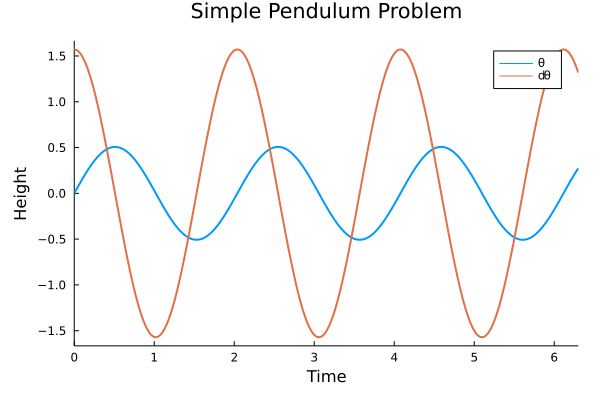

In [7]:
plot(sol,linewidth=2,title ="Simple Pendulum Problem", xaxis="Time", yaxis="Height", label=["\\theta" "d\\theta"])

## Manual simulation